In [2]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, learning_curve, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, classification_report
import warnings
import os
from datetime import date

# Ignore warnings
warnings.filterwarnings("ignore")

# Initialize Plotly in offline mode
py.offline.init_notebook_mode(connected=True)

# Enable inline plotting
%matplotlib inline

In [95]:
# Load and convert the date columns to datetime format

# student info
student_info = pd.read_csv('365_student_info.csv')
student_info['date_registered'] = pd.to_datetime(student_info['date_registered'])

# student purchases
student_purchases = pd.read_csv('365_student_purchases.csv')
student_purchases['date_purchased'] = pd.to_datetime(student_purchases['date_purchased'])

# student learning
student_learning = pd.read_csv('365_student_learning.csv')
student_learning['date_watched'] = pd.to_datetime(student_learning['date_watched'])

# course info
course_info = pd.read_csv('365_course_info.csv')

# course ratings
course_ratings = pd.read_csv('365_course_ratings.csv')
course_ratings['date_rated'] = pd.to_datetime(course_ratings['date_rated'])

# student quizes
student_quizzes = pd.read_csv('365_student_quizzes.csv')

# quiz info
quiz_info = pd.read_csv('365_student_quizzes.csv')

# student exams
student_exams = pd.read_csv('365_course_ratings.csv')
student_exams['date_rated'] = pd.to_datetime(student_exams['date_rated'])

# exam info
exam_info = pd.read_csv('365_exam_info.csv')

# student engagement
student_engagement = pd.read_csv('365_student_engagement.csv')
student_engagement['date_engaged'] = pd.to_datetime(student_engagement['date_engaged'])

# student hub questions
student_hub_questions = pd.read_csv('365_student_hub_questions.csv')
student_hub_questions['date_question_asked'] = pd.to_datetime(student_hub_questions['date_question_asked'])

In [97]:
# Importing list of countries' names and codes

data = {'Afghanistan': 'AF',
 'Albania': 'AL',
 'Algeria': 'DZ',
 'American Samoa': 'AS',
 'Andorra': 'AD',
 'Angola': 'AO',
 'Anguilla': 'AI',
 'Antarctica': 'AQ',
 'Antigua and Barbuda': 'AG',
 'Argentina': 'AR',
 'Armenia': 'AM',
 'Aruba': 'AW',
 'Australia': 'AU',
 'Austria': 'AT',
 'Azerbaijan': 'AZ',
 'Bahamas': 'BS',
 'Bahrain': 'BH',
 'Bangladesh': 'BD',
 'Barbados': 'BB',
 'Belarus': 'BY',
 'Belgium': 'BE',
 'Belize': 'BZ',
 'Benin': 'BJ',
 'Bermuda': 'BM',
 'Bhutan': 'BT',
 'Bolivia, Plurinational State of': 'BO',
 'Bonaire, Sint Eustatius and Saba': 'BQ',
 'Bosnia and Herzegovina': 'BA',
 'Botswana': 'BW',
 'Bouvet Island': 'BV',
 'Brazil': 'BR',
 'British Indian Ocean Territory': 'IO',
 'Brunei Darussalam': 'BN',
 'Bulgaria': 'BG',
 'Burkina Faso': 'BF',
 'Burundi': 'BI',
 'Cambodia': 'KH',
 'Cameroon': 'CM',
 'Canada': 'CA',
 'Cape Verde': 'CV',
 'Cayman Islands': 'KY',
 'Central African Republic': 'CF',
 'Chad': 'TD',
 'Chile': 'CL',
 'China': 'CN',
 'Christmas Island': 'CX',
 'Cocos (Keeling) Islands': 'CC',
 'Colombia': 'CO',
 'Comoros': 'KM',
 'Congo': 'CG',
 'Congo, the Democratic Republic of the': 'CD',
 'Cook Islands': 'CK',
 'Costa Rica': 'CR',
 'Croatia': 'HR',
 'Cuba': 'CU',
 'Curaçao': 'CW',
 'Cyprus': 'CY',
 'Czech Republic': 'CZ',
 "Côte d'Ivoire": 'CI',
 'Denmark': 'DK',
 'Djibouti': 'DJ',
 'Dominica': 'DM',
 'Dominican Republic': 'DO',
 'Ecuador': 'EC',
 'Egypt': 'EG',
 'El Salvador': 'SV',
 'Equatorial Guinea': 'GQ',
 'Eritrea': 'ER',
 'Estonia': 'EE',
 'Ethiopia': 'ET',
 'Falkland Islands (Malvinas)': 'FK',
 'Faroe Islands': 'FO',
 'Fiji': 'FJ',
 'Finland': 'FI',
 'France': 'FR',
 'French Guiana': 'GF',
 'French Polynesia': 'PF',
 'French Southern Territories': 'TF',
 'Gabon': 'GA',
 'Gambia': 'GM',
 'Georgia': 'GE',
 'Germany': 'DE',
 'Ghana': 'GH',
 'Gibraltar': 'GI',
 'Greece': 'GR',
 'Greenland': 'GL',
 'Grenada': 'GD',
 'Guadeloupe': 'GP',
 'Guam': 'GU',
 'Guatemala': 'GT',
 'Guernsey': 'GG',
 'Guinea': 'GN',
 'Guinea-Bissau': 'GW',
 'Guyana': 'GY',
 'Haiti': 'HT',
 'Heard Island and McDonald Islands': 'HM',
 'Holy See (Vatican City State)': 'VA',
 'Honduras': 'HN',
 'Hong Kong': 'HK',
 'Hungary': 'HU',
 'Iceland': 'IS',
 'India': 'IN',
 'Indonesia': 'ID',
 'Iran, Islamic Republic of': 'IR',
 'Iraq': 'IQ',
 'Ireland': 'IE',
 'Isle of Man': 'IM',
 'Israel': 'IL',
 'Italy': 'IT',
 'Jamaica': 'JM',
 'Japan': 'JP',
 'Jersey': 'JE',
 'Jordan': 'JO',
 'Kazakhstan': 'KZ',
 'Kenya': 'KE',
 'Kiribati': 'KI',
 "Korea, Democratic People's Republic of": 'KP',
 'Korea, Republic of': 'KR',
 'Kuwait': 'KW',
 'Kyrgyzstan': 'KG',
 "Lao People's Democratic Republic": 'LA',
 'Latvia': 'LV',
 'Lebanon': 'LB',
 'Lesotho': 'LS',
 'Liberia': 'LR',
 'Libya': 'LY',
 'Liechtenstein': 'LI',
 'Lithuania': 'LT',
 'Luxembourg': 'LU',
 'Macao': 'MO',
 'Macedonia, the former Yugoslav Republic of': 'MK',
 'Madagascar': 'MG',
 'Malawi': 'MW',
 'Malaysia': 'MY',
 'Maldives': 'MV',
 'Mali': 'ML',
 'Malta': 'MT',
 'Marshall Islands': 'MH',
 'Martinique': 'MQ',
 'Mauritania': 'MR',
 'Mauritius': 'MU',
 'Mayotte': 'YT',
 'Mexico': 'MX',
 'Micronesia, Federated States of': 'FM',
 'Moldova, Republic of': 'MD',
 'Monaco': 'MC',
 'Mongolia': 'MN',
 'Montenegro': 'ME',
 'Montserrat': 'MS',
 'Morocco': 'MA',
 'Mozambique': 'MZ',
 'Myanmar': 'MM',
 'Namibia': 'NA',
 'Nauru': 'NR',
 'Nepal': 'NP',
 'Netherlands': 'NL',
 'New Caledonia': 'NC',
 'New Zealand': 'NZ',
 'Nicaragua': 'NI',
 'Niger': 'NE',
 'Nigeria': 'NG',
 'Niue': 'NU',
 'Norfolk Island': 'NF',
 'Northern Mariana Islands': 'MP',
 'Norway': 'NO',
 'Oman': 'OM',
 'Pakistan': 'PK',
 'Palau': 'PW',
 'Palestine, State of': 'PS',
 'Panama': 'PA',
 'Papua New Guinea': 'PG',
 'Paraguay': 'PY',
 'Peru': 'PE',
 'Philippines': 'PH',
 'Pitcairn': 'PN',
 'Poland': 'PL',
 'Portugal': 'PT',
 'Puerto Rico': 'PR',
 'Qatar': 'QA',
 'Romania': 'RO',
 'Russian Federation': 'RU',
 'Rwanda': 'RW',
 'Réunion': 'RE',
 'Saint Barthélemy': 'BL',
 'Saint Helena, Ascension and Tristan da Cunha': 'SH',
 'Saint Kitts and Nevis': 'KN',
 'Saint Lucia': 'LC',
 'Saint Martin (French part)': 'MF',
 'Saint Pierre and Miquelon': 'PM',
 'Saint Vincent and the Grenadines': 'VC',
 'Samoa': 'WS',
 'San Marino': 'SM',
 'Sao Tome and Principe': 'ST',
 'Saudi Arabia': 'SA',
 'Senegal': 'SN',
 'Serbia': 'RS',
 'Seychelles': 'SC',
 'Sierra Leone': 'SL',
 'Singapore': 'SG',
 'Sint Maarten (Dutch part)': 'SX',
 'Slovakia': 'SK',
 'Slovenia': 'SI',
 'Solomon Islands': 'SB',
 'Somalia': 'SO',
 'South Africa': 'ZA',
 'South Georgia and the South Sandwich Islands': 'GS',
 'South Sudan': 'SS',
 'Spain': 'ES',
 'Sri Lanka': 'LK',
 'Sudan': 'SD',
 'Suriname': 'SR',
 'Svalbard and Jan Mayen': 'SJ',
 'Swaziland': 'SZ',
 'Sweden': 'SE',
 'Switzerland': 'CH',
 'Syrian Arab Republic': 'SY',
 'Taiwan, Province of China': 'TW',
 'Tajikistan': 'TJ',
 'Tanzania, United Republic of': 'TZ',
 'Thailand': 'TH',
 'Timor-Leste': 'TL',
 'Togo': 'TG',
 'Tokelau': 'TK',
 'Tonga': 'TO',
 'Trinidad and Tobago': 'TT',
 'Tunisia': 'TN',
 'Turkey': 'TR',
 'Turkmenistan': 'TM',
 'Turks and Caicos Islands': 'TC',
 'Tuvalu': 'TV',
 'Uganda': 'UG',
 'Ukraine': 'UA',
 'United Arab Emirates': 'AE',
 'United Kingdom': 'GB',
 'United States': 'US',
 'United States Minor Outlying Islands': 'UM',
 'Uruguay': 'UY',
 'Uzbekistan': 'UZ',
 'Vanuatu': 'VU',
 'Venezuela, Bolivarian Republic of': 'VE',
 'Viet Nam': 'VN',
 'Virgin Islands, British': 'VG',
 'Virgin Islands, U.S.': 'VI',
 'Wallis and Futuna': 'WF',
 'Western Sahara': 'EH',
 'Yemen': 'YE',
 'Zambia': 'ZM',
 'Zimbabwe': 'ZW',
 'Åland Islands': 'AX'}

In [98]:
# Create a dataframe from the data dictionary
countries = pd.DataFrame.from_dict(data, orient='index')

# Reset the index and rename the columns
countries.reset_index(inplace=True)
countries.columns = ['country', 'student_country']

# Merge the student_info dataframe with the countries dataframe
student_info = student_info.merge(countries, on='student_country', how='left')

In [21]:
new_students_by_date = student_info.groupby(student_info.date_registered.dt.date)['student_id'].count()
fig = px.line(new_students_by_date, x=new_students_by_date.index, y="student_id", labels=dict(x="date", y="number of registered students"))

fig.add_vrect(x0="2022-01-17", x1="2022-01-28", 
                             annotation_text="Winter Sale 2022", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="grey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2022-03-21", x1="2022-03-31", 
                             annotation_text="Spring Special Offer 2022", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="grey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2022-05-20", x1="2022-06-01", 
                             annotation_text="DS Summer Campaign 2022", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="grey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2022-07-18", x1="2022-07-29", 
                             annotation_text="Most Wanted Campaign", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="grey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2022-09-16", x1="2022-09-06", 
                             annotation_text="Platform gamification", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="grey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2022-09-19", x1="2022-09-30", 
                             annotation_text="Data Science Hero Campaign", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="grey", opacity=0.25, line_width=0)


fig.update_xaxes(rangeslider_visible=True)

fig.update_layout(title="Registered students over time", xaxis_title="Date", yaxis_title="Number of registered students", title_font=dict(size=16), xaxis_title_font=dict(size=14), yaxis_title_font=dict(size=14))

fig.update_traces(line=dict(color="grey", width=2))

fig.update_layout(font=dict(size=16))
               
fig.show()

In [22]:
new_students_by_country = student_info.groupby(student_info.country)['country'].count()
fig = px.histogram(new_students_by_country, x=new_students_by_country.index, y="country", height=800)
fig.update_layout(bargap=0.1)
fig.update_layout(xaxis={'categoryorder':'total descending'}) 

fig.update_xaxes(rangeslider_visible=True)
fig.update_traces(marker=dict(color="grey"))
fig.update_layout(font=dict(size=16))

fig.update_layout(title="Registered students per country", xaxis_title="Country", yaxis_title="Number of registered students", title_font=dict(size=16), xaxis_title_font=dict(size=14), yaxis_title_font=dict(size=14))

fig.show()

In [99]:
# Load and merge the data
subscriptions = pd.merge(student_purchases, student_info, on='student_id', how='left')

# Convert the date columns to datetime format
subscriptions['date_purchased'] = pd.to_datetime(subscriptions['date_purchased'])
subscriptions['date_registered'] = pd.to_datetime(subscriptions['date_registered'])

# Calculate the number of days between the registration and purchase dates
subscriptions['days_between_registration_and_purchase'] = (subscriptions['date_purchased'] - subscriptions['date_registered']).dt.days

subscriptions

,purchase_id,student_id,purchase_type,date_purchased,student_country,date_registered,country,days_between_registration_and_purchase
0,15781,258800,Annual,2022-01-01,CA,2022-01-01,Canada,0
1,15786,258803,Annual,2022-01-01,US,2022-01-01,United States,0
2,15808,258862,Annual,2022-01-01,NL,2022-01-01,Netherlands,0
3,15809,258865,Annual,2022-01-01,CA,2022-01-01,Canada,0
4,15811,258878,Annual,2022-01-01,CA,2022-01-01,Canada,0
...,...,...,...,...,...,...,...,...
3036,23148,278055,Monthly,2022-10-20,ZW,2022-06-16,Zimbabwe,126
3037,23150,270103,Annual,2022-10-20,GB,2022-04-08,United Kingdom,195
3038,23151,270824,Monthly,2022-10-20,US,2022-04-14,United States,189
3039,23152,295497,Monthly,2022-10-20,NL,2022-10-20,Netherlands,0


In [100]:
grouped_subscriptions = subscriptions.groupby('days_between_registration_and_purchase')['days_between_registration_and_purchase'].count()
grouped_subscriptions = grouped_subscriptions.rename_axis('passed_days').reset_index()

In [26]:
fig = px.histogram(grouped_subscriptions, x='passed_days', y="days_between_registration_and_purchase", nbins=196, color_discrete_sequence=['grey'])

fig.update_layout(title="Days between registration and purchase", xaxis_title="Days", yaxis_title="Number of purchases", title_font=dict(size=16), xaxis_title_font=dict(size=14), yaxis_title_font=dict(size=14))

fig.show()

In [28]:
fig = px.histogram(subscriptions, x="country", height=800)
fig.update_layout(bargap=0.1)
fig.update_layout(xaxis={'categoryorder':'total descending'}) 
fig.update_xaxes(rangeslider_visible=True)

fig.update_traces(marker_color='grey')

fig.update_layout(title="Number of purchases per country", xaxis_title="Country", yaxis_title="Number of purchases", title_font=dict(size=16), xaxis_title_font=dict(size=14), yaxis_title_font=dict(size=14))

fig.show()

In [29]:
# create histogram plot
fig = px.histogram(student_purchases, x="purchase_type", color_discrete_sequence=["grey"])

# update layout
fig.update_layout(
    title="Number of purchases by type",  # set title
    xaxis_title="Purchase type",  # set x-axis title
    yaxis_title="Number of purchases",  # set y-axis title
    title_font=dict(size=16),  # set title font size
    xaxis_title_font=dict(size=14),  # set x-axis title font size
    yaxis_title_font=dict(size=14)  # set y-axis title font size
)

# show plot
fig.show()

In [33]:
fig = px.histogram(student_purchases, x="date_purchased", color="purchase_type", title="Number of purchases by type over time")
fig.update_layout(bargap=0.1)
fig.update_xaxes(rangeslider_visible=True)

fig.add_vrect(x0="2022-01-17", x1="2022-01-28", 
                             annotation_text="Winter Sale 2022", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="grey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2022-03-21", x1="2022-03-31", 
                             annotation_text="Spring Special Offer 2022", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="grey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2022-05-20", x1="2022-06-01", 
                             annotation_text="DS Summer Campaign 2022", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="grey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2022-07-18", x1="2022-07-29", 
                             annotation_text="Most Wanted Campaign", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="grey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2022-09-16", x1="2022-09-06", 
                             annotation_text="Platform gamification", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="grey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2022-09-19", x1="2022-09-30", 
                             annotation_text="Data Science Hero Campaign", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="grey", opacity=0.25, line_width=0)

fig.show()

In [40]:
fig = px.histogram(student_purchases, x="date_purchased", title="Number of purchases by type over time", color_discrete_sequence=['grey'])
fig.update_layout(bargap=0.1, coloraxis_colorbar=dict(title='Purchase Type'))
fig.update_xaxes(rangeslider_visible=True)

fig.add_vrect(x0="2022-01-17", x1="2022-01-28", 
                             annotation_text="Winter Sale 2022", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="lightgrey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2022-03-21", x1="2022-03-31", 
                             annotation_text="Spring Special Offer 2022", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="lightgrey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2022-05-20", x1="2022-06-01", 
                             annotation_text="Data Science Summer Campaign 2022", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="lightgrey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2022-07-18", x1="2022-07-29", 
                             annotation_text="Most Wanted Campaign", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="lightgrey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2022-09-16", x1="2022-09-06", 
                             annotation_text="Platform gamification", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="lightgrey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2022-09-19", x1="2022-09-30", 
                             annotation_text="Data Science Hero Campaign", annotation_position="top left",
                             annotation=dict(font_size=11, font_family="Times New Roman", textangle=270),
                             fillcolor="lightgrey", opacity=0.25, line_width=0)

fig.show()

In [42]:
student_learning_merged = pd.merge(student_learning,course_info,on='course_id',how='outer')

fig = px.box(student_learning_merged, x="course_title", y="minutes_watched", width=1100, height=1700)

fig.show()

In [101]:
aggregate_stats = student_learning_merged.groupby('course_title')['minutes_watched'].agg(['median', 'mean', 'min', 'max'])

courses = pd.DataFrame(aggregate_stats)

courses

,median,mean,min,max
course_title,,,,
A/B Testing in Python,4.80,19.846269,0.1,207.0
AI Applications for Business Success,5.00,20.036508,0.1,154.3
Advanced Microsoft Excel,17.10,26.788849,0.1,186.2
Convolutional Neural Networks with TensorFlow in Python,22.10,34.668908,0.1,427.9
Credit Risk Modeling in Python,11.60,23.669028,0.1,214.6
Customer Analytics in Python,16.45,28.452448,0.1,214.5
Data Analysis with Excel Pivot Tables,16.50,35.801318,0.0,799.6
Data Cleaning and Preprocessing with pandas,21.00,37.206442,0.1,798.2
Data Literacy,27.25,37.077068,0.1,311.6


In [102]:
# Aggregate watch time stats by course
watch_time_stats = student_learning_merged.groupby('course_title')['minutes_watched'].agg(['median', 'mean', 'min', 'max'])

# Create a data frame for the watch time stats
watch_time = pd.DataFrame(watch_time_stats)

# Rename the columns to include "watch time" in the names
watch_time = watch_time.rename(columns={'median': 'median watch time', 'mean': 'mean watch time', 'min': 'min watch time', 'max': 'max watch time'})

# Read in course ratings data and convert date_rated to datetime format
course_ratings = pd.read_csv('365_course_ratings.csv')
course_ratings['date_rated'] = pd.to_datetime(course_ratings['date_rated'])

# Merge the course ratings data with course_info
course_ratings = pd.merge(course_ratings, course_info, on='course_id', how='outer')

# Aggregate rating stats by course
rating_stats = course_ratings.groupby('course_title')['course_rating'].agg(['median', 'mean', 'min', 'max', 'count'])

# Create a data frame for the rating stats
ratings = pd.DataFrame(rating_stats)

# Rename the columns to include "rating" in the names
ratings = ratings.rename(columns={'median': 'median rating', 'mean': 'mean rating', 'min': 'min rating', 'max': 'max rating', 'count': 'popularity'})

# Merge the watch time and rating data frames
courses = pd.merge(watch_time, ratings, on='course_title')

# Drop the course with the title "Machine Learning with Ridge and Lasso Regression"
courses = courses.drop('Machine Learning with Ridge and Lasso Regression')

# Display the resulting data frame
courses

,median watch time,mean watch time,min watch time,max watch time,median rating,mean rating,min rating,max rating,popularity
course_title,,,,,,,,,
A/B Testing in Python,4.80,19.846269,0.1,207.0,5.0,4.750000,3.0,5.0,12
AI Applications for Business Success,5.00,20.036508,0.1,154.3,4.5,4.250000,3.0,5.0,4
Advanced Microsoft Excel,17.10,26.788849,0.1,186.2,5.0,4.860000,2.0,5.0,50
Convolutional Neural Networks with TensorFlow in Python,22.10,34.668908,0.1,427.9,5.0,4.750000,4.0,5.0,4
Credit Risk Modeling in Python,11.60,23.669028,0.1,214.6,5.0,4.705882,3.0,5.0,17
Customer Analytics in Python,16.45,28.452448,0.1,214.5,5.0,5.000000,5.0,5.0,11
Data Analysis with Excel Pivot Tables,16.50,35.801318,0.0,799.6,5.0,4.844444,3.0,5.0,90
Data Cleaning and Preprocessing with pandas,21.00,37.206442,0.1,798.2,5.0,4.622642,1.0,5.0,53
Data Literacy,27.25,37.077068,0.1,311.6,5.0,4.791667,3.0,5.0,72


In [103]:
# Calculate the number of days since each student was registered
student_info['days_since_registered'] = (np.datetime64('today') - student_info['date_registered']).dt.days

# Drop the purchase_id column from student_purchases
student_purchases = student_purchases.drop(columns=['purchase_id'])

# Replace the string values in the purchase_type column with integer values
student_purchases['purchase_type'] = student_purchases['purchase_type'].replace({'Annual': 1, 'Monthly': 2, 'Quarterly': 3})

# Merge student_info and student_purchases, adding an indicator column
mix = student_info.merge(student_purchases, on='student_id', how='left', indicator=True)

# Replace null values in the purchase_type and date_purchased columns with 0 and today's date, respectively
mix['purchase_type'] = mix['purchase_type'].replace(np.nan, 0)
mix['date_purchased'] = mix['date_purchased'].replace(np.nan, np.datetime64('today'))
mix["date_registeed_vs_purchased"] = (mix['date_purchased'] - mix['date_registered']).dt.days

# Calculate the number of days between the date the student registered and the date they purchased a subscription
mix['date_registered_vs_purchased'] = (mix['date_purchased'] - mix['date_registered']).dt.days

# Drop the course_id column from student_learning
student_learning = student_learning.drop(columns=['course_id'])

# Group the student_learning data by student_id and sum the minutes_watched column
grouped_student_learning = student_learning.groupby('student_id').sum()

# Reset the index of grouped_student_learning
grouped_student_learning.reset_index(inplace=True)

# Merge mix and grouped_student_learning
mix2 = mix.merge(grouped_student_learning, on='student_id', how='left')

# Drop the _merge and date_purchased columns from mix2
mix2 = mix2.drop(columns=['_merge', 'date_purchased'])

# Replace null values in the minutes_watched column with 0
mix2["minutes_watched"] = mix2["minutes_watched"].replace(np.nan, 0)

# Group the student_exams data by student_id and calculate the mean course_rating
grouped_student_exams = student_exams.groupby('student_id')['course_rating'].mean()

# Rename the index of grouped_student_exams to student_id
grouped_student_exams = grouped_student_exams.rename_axis('student_id').reset_index()

# Merge mix3 and grouped_student_exams
mix3 = mix2.merge(grouped_student_exams, on='student_id', how='left')

# Group the student_exams data by student_id and count the number of course_rating values
grouped_student_exams2 = student_exams.groupby('student_id')['course_rating'].count()

# Rename the index of grouped_student_exams2 to student_id
grouped_student_exams2 = grouped_student_exams2.rename_axis('student_id').reset_index()

# Merge mix4 and grouped_student_exams2
mix4 = mix3.merge(grouped_student_exams2, on='student_id', how='left')

# Replace null values in the course_rating_y column with 0
mix4["course_rating_y"] = mix4["course_rating_y"].replace(np.nan, 0)

# Drop the course_rating_x column from mix4
mix4 = mix4.drop(columns=['course_rating_x'])

# Group the student_engagement data by student_id and sum the engagement_quizzes, engagement_exams, and engagement_lessons columns
grouped_student_engagement = student_engagement.groupby('student_id').sum()

# Drop the engagement_id column from grouped_student_engagement
grouped_student_engagement = grouped_student_engagement.drop(columns=['engagement_id'])

# Reset the index of grouped_student_engagement
grouped_student_engagement.reset_index(inplace=True)

# Merge mix4 and grouped_student_engagement on student_id, using a left join
mix5 = mix4.merge(grouped_student_engagement, on='student_id', how='left')

# Replace NaN values in engagement_quizzes, engagement_exams, and engagement_lessons with 0
mix5["engagement_quizzes"] = mix5["engagement_quizzes"].replace(np.nan, 0)
mix5["engagement_exams"] = mix5["engagement_exams"].replace(np.nan, 0)
mix5["engagement_lessons"] = mix5["engagement_lessons"].replace(np.nan, 0)

# Group student_hub_questions by student_id and count the number of rows for each student
grouped_student_hub_questions = student_hub_questions.groupby('student_id').count()
# Drop the column hub_question_id
grouped_student_hub_questions = grouped_student_hub_questions.drop(columns=['hub_question_id'])
# Reset the index of grouped_student_hub_questions
grouped_student_hub_questions.reset_index(inplace=True)

# Merge mix5 and grouped_student_hub_questions on student_id, using a left join
mix6 = mix5.merge(grouped_student_hub_questions, on='student_id', how='left')

# Replace NaN values in date_question_asked with 0
mix6["date_question_asked"] = mix6["date_question_asked"].replace(np.nan, 0)

# Create a new column called has_subscription in mix6 and assign the values from the column purchase_type
mix6['has_subscription'] = mix6['purchase_type']

# Replace the values 2 and 3 in the column has_subscription with 1
mix6["has_subscription"] = mix6["has_subscription"].replace(np.int(2), int(1))
mix6["has_subscription"] = mix6["has_subscription"].replace(np.int(3), int(1))

# Drop the columns date_registeed_vs_purchased, purchase_type, student_id, and country from mix6
mix6 = mix6.drop(columns=['date_registeed_vs_purchased'])
mix6 = mix6.drop(columns=['purchase_type'])
mix6 = mix6.drop(columns=['student_id'])
mix6 = mix6.drop(columns=['country'])

In [104]:
df = mix6
df

,student_country,date_registered,days_since_registered,date_registered_vs_purchased,minutes_watched,course_rating_y,engagement_quizzes,engagement_exams,engagement_lessons,date_question_asked,has_subscription
0,IN,2022-01-01,353,353,0.3,0.0,0.0,0.0,1.0,0.0,0.0
1,CO,2022-01-01,353,353,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CA,2022-01-01,353,0,531.2,0.0,10.0,5.0,29.0,0.0,1.0
3,IN,2022-01-01,353,353,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,US,2022-01-01,353,353,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
36131,CM,2022-10-20,61,61,7.8,0.0,1.0,0.0,1.0,0.0,0.0
36132,CA,2022-10-20,61,61,10.4,0.0,1.0,0.0,1.0,0.0,0.0
36133,SA,2022-10-20,61,61,0.1,0.0,0.0,0.0,1.0,0.0,0.0
36134,NL,2022-10-20,61,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
data = df

In [106]:
# Separate the features and target
X = data.drop('has_subscription', axis=1)
y = data['has_subscription']

<AxesSubplot:>

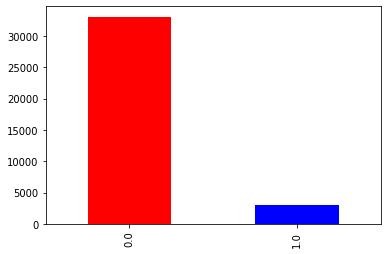

In [107]:
# Plot a bar chart to check if the data is balanced
y.value_counts().plot(kind='bar', color=['red', 'blue'])

In [108]:
# Create an instance of RandomUnderSampler
rsu = RandomUnderSampler()

In [109]:
# Use the fit_resample method of RandomUnderSampler to undersample the data
X_res, y_res = rsu.fit_resample(X, y)

<AxesSubplot:>

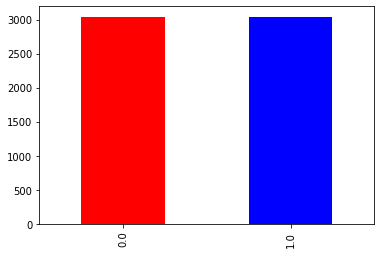

In [110]:
# Plot a bar chart to check the balance of the undersampled data
y_res.value_counts().plot(kind='bar', color=['red', 'blue'])

In [111]:
# Split the data into training and test sets, with 20% of the data in the test set
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=365, stratify=y_res)

In [112]:
# Print the proportion of the target in the training and test sets
print(y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))

1.0    0.500103
0.0    0.499897
Name: has_subscription, dtype: float64 0.0    0.500411
1.0    0.499589
Name: has_subscription, dtype: float64


In [113]:
# Define the imputer
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer to the training data
fit = imputer.fit(X_train)

# Transform the training and test data using the imputer
X_train = pd.DataFrame(data = fit.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data = fit.transform(X_test), columns=X_test.columns)

In [114]:
# Check if there are any missing values in the training and test data
print("Missing values in train data : \n", X_train.isnull().sum())
print("Missing values in test data : \n", X_test.isnull().sum())

Missing values in train data : 
 student_country                 0
date_registered                 0
days_since_registered           0
date_registered_vs_purchased    0
minutes_watched                 0
course_rating_y                 0
engagement_quizzes              0
engagement_exams                0
engagement_lessons              0
date_question_asked             0
dtype: int64
Missing values in test data : 
 student_country                 0
date_registered                 0
days_since_registered           0
date_registered_vs_purchased    0
minutes_watched                 0
course_rating_y                 0
engagement_quizzes              0
engagement_exams                0
engagement_lessons              0
date_question_asked             0
dtype: int64


In [133]:
# Convert the 'date_registered' column to datetime
X_train['date_registered'] = pd.to_datetime(X_train['date_registered'])
X_test['date_registered'] = pd.to_datetime(X_test['date_registered'])

In [137]:
# Define the one-hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Select the categorical feature
categorical_feature = ['student_country']

# Fit the encoder to the training data and transform the training data
X_train_encoded = encoder.fit_transform(X_train[categorical_feature])

# Transform the test data using the encoder
X_test_encoded = encoder.transform(X_test[categorical_feature])

# Get the list of categories
categories = encoder.categories_[0]

# Create the names for the encoded features
feature_names = [f"{categorical_feature[0]}_{category}" for category in categories]

# Recreate the dataframes using the encoded data
X_train_encoded = pd.DataFrame(X_train_encoded.toarray(), columns=feature_names)
X_test_encoded = pd.DataFrame(X_test_encoded.toarray(), columns=feature_names)

# Concatenate the encoded data with the other features
X_train = pd.concat([X_train_encoded, X_train.drop(categorical_feature, axis=1)], axis=1)
X_test = pd.concat([X_test_encoded, X_test.drop(categorical_feature, axis=1)], axis=1)


In [142]:
# Define the reference date
reference_date = pd.to_datetime("1900-01-01")

# Convert the datetime column to a numerical representation
X_train["date_registered"] = (X_train["date_registered"] - reference_date).dt.days
X_test["date_registered"] = (X_test["date_registered"] - reference_date).dt.days

# Define the scaler
scaler = MinMaxScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data using the scaler fitted to the training data
X_test_scaled = scaler.transform(X_test)

# Recreate the dataframes using the scaled data
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [143]:
# Define the scaler
scaler = MinMaxScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data using the scaler fitted to the training data
X_test_scaled = scaler.transform(X_test)

# Recreate the dataframes using the scaled data
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [145]:
# Import the KNeighborsClassifier class from the sklearn.neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Define the model
model = KNeighborsClassifier(n_neighbors=4)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. KNeighborsClassifier KNeighborsClassifier(n_neighbors=4)

In [147]:
# Make predictions on the test data
predictions = model.predict(X_train_scaled)

In [158]:
# Check the dimensions of the training data
print("Number of samples in training data:", X_train.shape[0])
print("Number of features in training data:", X_train.shape[1])

# Check the dimensions of the test data
print("Number of samples in test data:", X_test.shape[0])
print("Number of features in test data:", X_test.shape[1])

Number of samples in training data: 4865
Number of features in training data: 142
Number of samples in test data: 1217
Number of features in test data: 142


In [159]:
# Fit the model to the training data
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. KNeighborsClassifier KNeighborsClassifier(n_neighbors=4)

In [172]:
y_predict = model.predict(X_test)

In [174]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_predict)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9991783073130649


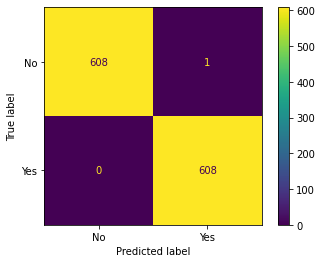

In [177]:


# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_predict)

# Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix, display_labels=['No', 'Yes'])
display.plot()

In [178]:
# Generate the classification report
report = classification_report(y_test, y_predict)

# Print the classification report
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       609
         1.0       1.00      1.00      1.00       608

    accuracy                           1.00      1217
   macro avg       1.00      1.00      1.00      1217
weighted avg       1.00      1.00      1.00      1217

